# Data Cleaning : Time Series Data


- A hypothetical company, ABC Financial Services Corp makes financial investment decisions on behalf of it's clients based on the company's economic research. A lot of these decisions involve speculating whether financial instruments will increase or decrease in value in the future.
- ABC Corp utilizes several economic indicators but there is one in particular that is heavily weighted in their analysis and that is the [University of Michigan's Consumer Sentiment Survey](https://en.wikipedia.org/wiki/University_of_Michigan_Consumer_Sentiment_Index).
- The only problem is that they have to wait for the release of this indicator which erodes some of their competitive advantage in the market and they would like a way to predict this number.
- I propose to use a form of Machine Learning (ML) to make Time Series preditions on the final Consumer Sentiment number to be released.
- To do this we are going to use other economic indicators (as features) released before and data from various relevant industries to construct a dataset that is ready to run on predictive algorithims.
- The historical datasets that ABC Corp uses will be downloaded as follows:
    - [The Dow Jones Index](https://finance.yahoo.com/quote/%5EDJI/history/)
    - [US Unemployemnt (Jobless Claims) data from the US Department of Labor](https://fred.stlouisfed.org/series/UNRATE)
    - [Historical price of Crude Oil in the open market](https://fred.stlouisfed.org/series/MCOILBRENTEU)
    - [New Housing Starts from US Census Beareau](https://fred.stlouisfed.org/series/HOUST#0)
    - [Total Vehicles Sold](https://fred.stlouisfed.org/series/TOTALSA)
    - [Retail Sales data from US Census Beareau](https://fred.stlouisfed.org/series/RSXFS)
    - [Federal Interest Rates](https://fred.stlouisfed.org/series/FEDFUNDS])
    - [The University of Michigan's Consumer Sentiment Survey](http://www.sca.isr.umich.edu/)  -- data to predict

Data cleaning is highly dependent on the type of data and the task to be achieved. In our case we combine data from different sources and clean up the resulting dataframe. In image classification data, we may have to reshape the image sizes and create labels while a sentiment analysis dataset may need to be checked for spelling and keyword extraction.

Moving forward, we will first import any libraries that we need to handle our data cleaning process.

In [2]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
%matplotlib inline
from scipy import stats
from datetime import datetime
from functools import reduce
import datetime
sns.set_style("darkgrid")

## Exercise 1:

1- Load all datasets (locate at `../data/` repository) to pandas DataFrames
```python
>>> dow     = 
>>> unemp   =
>>> oil     = 
>>> hstarts = 
>>> cars    = 
>>> retail  = 
>>> fedrate = 
>>> umcsi   = 
```

In [3]:
!pip install xlrd

In [4]:
# Your code here
dow     = pd.read_csv('../data/Dow Jones Industrial Average DJI.csv')
unemp   = pd.read_csv('../data/Civilian Unemployment Rate UNRATE.csv')
oil     = pd.read_csv('../data/Crude Oil Prices MCOILBRENTEU.csv')
hstarts = pd.read_csv('../data/Housing Starts HOUST.csv')
cars    = pd.read_csv('../data/Total Vehicle SalesTOTALSA .csv')
retail  = pd.read_csv('../data/Advance Retail Sales_RSXFS.csv')
fedrate = pd.read_csv('../data/Federal Interest Rates FEDFUNDS.csv')
umcsi   = pd.read_excel('../data/consumer_sent_UMCH_tbmics.xls', index_col=[0])

2- Visually inspect the dataframes
    - 5 first rows for dow, umemp an oil
    - 5 last rows for umcsi and cars

In [5]:
# Your code here
dow.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-01-01,1277.719971,1305.099976,1266.890015,1286.770020,1286.770020,44450000
1,1985-02-01,1276.939941,1307.530029,1263.910034,1284.010010,1284.010010,207300000
2,1985-03-01,1285.339966,1309.959961,1242.819946,1266.780029,1266.780029,201050000
3,1985-04-01,1264.800049,1290.300049,1245.800049,1258.060059,1258.060059,187110000
4,1985-05-01,1257.180054,1320.790039,1235.530029,1315.410034,1315.410034,242250000


In [6]:
unemp.head(5)

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [7]:
oil.head(5)

,DATE,MCOILBRENTEU
0,1987-05-01,18.58
1,1987-06-01,18.86
2,1987-07-01,19.86
3,1987-08-01,18.98
4,1987-09-01,18.31


In [8]:
umcsi.tail(5)

,Unnamed: 1,THE INDEX OF CONSUMER SENTIMENT
September,2017.0,95.1
October,2017.0,100.7
November,2017.0,98.5
December,2017.0,95.9
January,2018.0,95.7


In [9]:
cars.tail(5)

,DATE,TOTALSA
500,2017-09-01,18.9
501,2017-10-01,18.4
502,2017-11-01,17.9
503,2017-12-01,18.2
504,2018-01-01,17.5


3- Get the shape of the different datasets

In [10]:
# Your code here
print("Dow shape is : ", dow.shape)
print("Unemp shape is : ", unemp.shape)
print("Oil shape is : ", oil.shape)
print("Hstarts shape is : ", hstarts.shape)
print("Cars shape is : ", cars.shape)
print("Retail shape is : ", retail.shape)
print("fedrate shape is : ", fedrate.shape)
print("umcsi shape is : ", umcsi.shape)

Dow shape is :  (399, 7)
Unemp shape is :  (841, 2)
Oil shape is :  (369, 2)
Hstarts shape is :  (709, 2)
Cars shape is :  (505, 2)
Retail shape is :  (313, 2)
fedrate shape is :  (763, 2)
umcsi shape is :  (577, 2)


4- Get dataframe top rows view

In [11]:
# Your code here


5- Print the statistical charateristics of the datsets. 
    - Explain the output
    > write your answer here

In [12]:
!pip install tabulate

In [13]:
# Your code here
print("Dow dataset statistics : \n ", dow.describe().to_markdown(), "\n")
print("Unemp dataset statistics : \n ", unemp.describe().to_markdown(), "\n")
print("Oil dataset statistics : \n ", oil.describe().to_markdown(), "\n")
print("Hstarts dataset statistics : \n ", hstarts.describe().to_markdown(), "\n")
print("cars dataset statistics : \n ", cars.describe().to_markdown(), "\n")
print("retail dataset statistics : \n ", retail.describe().to_markdown(), "\n")
print("fedrate dataset statistics : \n ", fedrate.describe().to_markdown(), "\n")
print("umcsi dataset statistics : \n ", umcsi.describe().to_markdown())

Dow dataset statistics : 
  |       |     Open |     High |      Low |    Close |   Adj Close |        Volume |
|:------|---------:|---------:|---------:|---------:|------------:|--------------:|
| count |   399    |   399    |   399    |   399    |      399    | 399           |
| mean  |  8942.16 |  9234.28 |  8663.22 |  9000.77 |     9000.77 |   2.70831e+09 |
| std   |  5477.9  |  5608.61 |  5352.62 |  5521.22 |     5521.22 |   2.23505e+09 |
| min   |  1257.18 |  1290.3  |  1235.53 |  1258.06 |     1258.06 |   4.445e+07   |
| 25%   |  3437.25 |  3523.6  |  3389.56 |  3475.6  |     3475.6  |   5.35065e+08 |
| 50%   |  9492.32 |  9986.49 |  9116.52 |  9712.28 |     9712.28 |   2.17326e+09 |
| 75%   | 12112.2  | 12372.2  | 11643.9  | 12180.4  |    12180.4  |   4.63915e+09 |
| max   | 26083    | 26616.7  | 25149.3  | 26149.4  |    26149.4  |   1.05611e+10 | 

Unemp dataset statistics : 
  |       |    UNRATE |
|:------|----------:|
| count | 841       |
| mean  |   5.78775 |
| std   |   

6- Which datasets have null values

In [14]:
# Your code here
print("number of null values in dow is : ", dow.isnull().sum().sum())
print("number of null values in unemp is : ", unemp.isnull().sum().sum())
print("number of null values in oil is : ", oil.isnull().sum().sum())
print("number of null values in hstarts is : ", hstarts.isnull().sum().sum())
print("number of null values in cars is : ", cars.isnull().sum().sum())
print("number of null values in retail is : ", retail.isnull().sum().sum())
print("number of null values in fedrate is : ", fedrate.isnull().sum().sum())
print("number of null values in umcsi is : ", umcsi.isnull().sum().sum())

number of null values in dow is :  0
number of null values in unemp is :  0
number of null values in oil is :  0
number of null values in hstarts is :  0
number of null values in cars is :  0
number of null values in retail is :  0
number of null values in fedrate is :  0
number of null values in umcsi is :  7


7- What are your observations ?
> write your answer here
- The UMCSI dataset has 10 null values

## Exercise 2: dow dataset

1- Drop column volume

In [15]:
# Your code here
dow = dow.drop(columns = ['Volume'])
dow.head()

,Date,Open,High,Low,Close,Adj Close
0,1985-01-01,1277.719971,1305.099976,1266.890015,1286.770020,1286.770020
1,1985-02-01,1276.939941,1307.530029,1263.910034,1284.010010,1284.010010
2,1985-03-01,1285.339966,1309.959961,1242.819946,1266.780029,1266.780029
3,1985-04-01,1264.800049,1290.300049,1245.800049,1258.060059,1258.060059
4,1985-05-01,1257.180054,1320.790039,1235.530029,1315.410034,1315.410034


2- Rename columns to upper case to match other dfs

In [16]:
# Your code here
dow = dow.rename(columns={'Date': 'Date'.upper(), 'Open': 'Open'.upper(), 'High' : 'High'.upper(), 'Low' : 'Low'.upper(), 
                         'Close' : 'Close'.upper(), 'Adj Close' : 'Adj Close'.upper()})

In [17]:
dow

,DATE,OPEN,HIGH,LOW,CLOSE,ADJ CLOSE
0,1985-01-01,1277.719971,1305.099976,1266.890015,1286.770020,1286.770020
1,1985-02-01,1276.939941,1307.530029,1263.910034,1284.010010,1284.010010
2,1985-03-01,1285.339966,1309.959961,1242.819946,1266.780029,1266.780029
3,1985-04-01,1264.800049,1290.300049,1245.800049,1258.060059,1258.060059
4,1985-05-01,1257.180054,1320.790039,1235.530029,1315.410034,1315.410034
...,...,...,...,...,...,...
394,2017-11-01,23442.900391,24327.820313,23242.750000,24272.349609,24272.349609
395,2017-12-01,24305.400391,24876.070313,23921.900391,24719.220703,24719.220703
396,2018-01-01,24809.349609,26616.710938,24741.699219,26149.390625,26149.390625
397,2018-02-01,26083.039063,26306.699219,23360.289063,25219.380859,25219.380859


3- Create 'Year' column with int values instead of float. Use function bellow:

```python
>>> def to_int(x):
>>>     return int(x)
```

In [18]:
dow['DATE'] = pd.to_datetime(dow['DATE'])

In [19]:
dow['YEAR'] = pd.DatetimeIndex(dow['DATE']).year

In [20]:
dow['YEAR']

0      1985
1      1985
2      1985
3      1985
4      1985
       ... 
394    2017
395    2017
396    2018
397    2018
398    2018
Name: YEAR, Length: 399, dtype: int64

In [21]:
# Your code here
def to_int(x):
    return int(x)

## Exercise 3: umcsi dataset

1- Drop NaN Values

In [22]:
# Your code here
umcsi_df = umcsi.dropna()

In [23]:
umcsi_df

,Unnamed: 1,THE INDEX OF CONSUMER SENTIMENT
November,1952.0,86.2
February,1953.0,90.7
August,1953.0,80.8
November,1953.0,80.7
February,1954.0,82
...,...,...
September,2017.0,95.1
October,2017.0,100.7
November,2017.0,98.5
December,2017.0,95.9


2- Combine year columns to one column format

In [24]:
# Your code here
umcsi_df = umcsi_df.reset_index()
umcsi_df.rename(columns={'Unnamed: 1':'YEAR'}, inplace=True)

In [25]:
umcsi_df

,index,YEAR,THE INDEX OF CONSUMER SENTIMENT
0,November,1952.0,86.2
1,February,1953.0,90.7
2,August,1953.0,80.8
3,November,1953.0,80.7
4,February,1954.0,82
...,...,...,...
568,September,2017.0,95.1
569,October,2017.0,100.7
570,November,2017.0,98.5
571,December,2017.0,95.9


In [26]:
umcsi_df['YEAR'] = umcsi_df['YEAR'].astype(int)
umcsi_df['DATE'] = umcsi_df[umcsi_df.columns[0:2]].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)
umcsi_df

,index,YEAR,THE INDEX OF CONSUMER SENTIMENT,DATE
0,November,1952,86.2,November 1952
1,February,1953,90.7,February 1953
2,August,1953,80.8,August 1953
3,November,1953,80.7,November 1953
4,February,1954,82,February 1954
...,...,...,...,...
568,September,2017,95.1,September 2017
569,October,2017,100.7,October 2017
570,November,2017,98.5,November 2017
571,December,2017,95.9,December 2017


3- Turn date format to string to match other DATE's for umcsi dataset. We'll merge the data on this column so this is a vital step. Use the function bellow:

```python
>>> def to_str(x):
>>>     return str(x)[:10]
```

In [27]:
# Your code here
def to_str(x):
     return str(x)[:10]

4- Drop unneeded columns for umcsi dataset

In [28]:
umcsi_df = umcsi_df.drop(columns=['index', 'YEAR'])
umcsi_df

,THE INDEX OF CONSUMER SENTIMENT,DATE
0,86.2,November 1952
1,90.7,February 1953
2,80.8,August 1953
3,80.7,November 1953
4,82,February 1954
...,...,...
568,95.1,September 2017
569,100.7,October 2017
570,98.5,November 2017
571,95.9,December 2017


5- Move 'DATE' column to the front

In [53]:
# Your code here
column_names = ["DATE", "THE INDEX OF CONSUMER SENTIMENT"]
umcsi_df = umcsi_df.reindex(columns=column_names)
umcsi_df

,DATE,THE INDEX OF CONSUMER SENTIMENT
0,November 1952,86.2
1,February 1953,90.7
2,August 1953,80.8
3,November 1953,80.7
4,February 1954,82
...,...,...
568,September 2017,95.1
569,October 2017,100.7
570,November 2017,98.5
571,December 2017,95.9


In [40]:
umcsi_df['DATE'] = pd.to_datetime(umcsi_df['DATE'])
umcsi_df.dtypes

THE INDEX OF CONSUMER SENTIMENT            object
DATE                               datetime64[ns]
dtype: object

In [43]:
dow['DATE'] = pd.to_datetime(dow['DATE'])
unemp['DATE'] = pd.to_datetime(unemp['DATE'])
oil['DATE'] = pd.to_datetime(oil['DATE'])
hstarts['DATE'] = pd.to_datetime(hstarts['DATE'])
cars['DATE'] = pd.to_datetime(cars['DATE'])
retail['DATE'] = pd.to_datetime(retail['DATE'])
fedrate['DATE'] = pd.to_datetime(fedrate['DATE'])

## Exercice 3: 

1- Concatenate all dataframes into one final dataframe using `lambda` function
    - Use the function `reduce` imported from `functools` library

In [56]:
# Your code here
data_frames = [dow, unemp, oil, hstarts, cars, retail, fedrate, umcsi_df]
df = reduce(lambda left, right:
                     pd.merge(left,right,on=['DATE'],
                                            how='outer'),
                     data_frames)
df

,DATE,OPEN,HIGH,LOW,CLOSE,ADJ CLOSE,YEAR,UNRATE,MCOILBRENTEU,HOUST,TOTALSA,RSXFS,FEDFUNDS,THE INDEX OF CONSUMER SENTIMENT
0,1985-01-01,1277.719971,1305.099976,1266.890015,1286.770020,1286.770020,1985.0,7.3,NaN,1711.0,15.6,NaN,8.35,96
1,1985-02-01,1276.939941,1307.530029,1263.910034,1284.010010,1284.010010,1985.0,7.2,NaN,1632.0,15.7,NaN,8.50,93.7
2,1985-03-01,1285.339966,1309.959961,1242.819946,1266.780029,1266.780029,1985.0,7.2,NaN,1800.0,15.4,NaN,8.58,93.7
3,1985-04-01,1264.800049,1290.300049,1245.800049,1258.060059,1258.060059,1985.0,7.3,NaN,1821.0,15.5,NaN,8.27,94.6
4,1985-05-01,1257.180054,1320.790039,1235.530029,1315.410034,1315.410034,1985.0,7.2,NaN,1680.0,15.6,NaN,7.97,91.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,1984-08-01,NaN,NaN,NaN,NaN,NaN,NaN,7.5,NaN,1586.0,14.3,NaN,11.64,99.1
839,1984-09-01,NaN,NaN,NaN,NaN,NaN,NaN,7.3,NaN,1698.0,14.0,NaN,11.30,100.9
840,1984-10-01,NaN,NaN,NaN,NaN,NaN,NaN,7.4,NaN,1590.0,14.6,NaN,9.99,96.3
841,1984-11-01,NaN,NaN,NaN,NaN,NaN,NaN,7.2,NaN,1689.0,14.8,NaN,9.43,95.7


2- Remove all rows with outliers in at least one row

In [62]:
# Your code here
qa = df['DATE'].quantile(0.1) #lower 10%
qb = df['DATE'].quantile(0.9) #higher 10%

print(qa, qb)

#remove outliers
xf = df[(df['DATE'] >= qa) & (df['DATE'] <= qb)]
print(xf)

1955-01-07 04:48:00 2011-02-23 09:36:00.000000256
          DATE         OPEN         HIGH          LOW        CLOSE  \
0   1985-01-01  1277.719971  1305.099976  1266.890015  1286.770020   
1   1985-02-01  1276.939941  1307.530029  1263.910034  1284.010010   
2   1985-03-01  1285.339966  1309.959961  1242.819946  1266.780029   
3   1985-04-01  1264.800049  1290.300049  1245.800049  1258.060059   
4   1985-05-01  1257.180054  1320.790039  1235.530029  1315.410034   
..         ...          ...          ...          ...          ...   
838 1984-08-01          NaN          NaN          NaN          NaN   
839 1984-09-01          NaN          NaN          NaN          NaN   
840 1984-10-01          NaN          NaN          NaN          NaN   
841 1984-11-01          NaN          NaN          NaN          NaN   
842 1984-12-01          NaN          NaN          NaN          NaN   

       ADJ CLOSE  VOLUME  UNEMP %  OIL PRICE  NEW HOMES  NEW CARS SOLD  \
0    1286.770020  1985.0      7.3  

In [65]:
xf = xf.dropna()
xf

,DATE,OPEN,HIGH,LOW,CLOSE,ADJ CLOSE,VOLUME,UNEMP %,OIL PRICE,NEW HOMES,NEW CARS SOLD,RETAIL SALES,FED INTRST %,CSI
84,1992-01-01,3152.100098,3299.189941,3139.310059,3223.399902,3223.399902,1992.0,7.3,18.16,1176.0,12.6,146913.0,4.03,67.5
85,1992-02-01,3223.399902,3293.379883,3207.959961,3267.699951,3267.699951,1992.0,7.4,18.05,1250.0,12.9,147270.0,4.06,68.8
86,1992-03-01,3267.699951,3299.639893,3188.280029,3235.500000,3235.500000,1992.0,7.4,17.63,1297.0,12.8,146831.0,3.98,76
87,1992-04-01,3235.500000,3366.500000,3161.229980,3359.100098,3359.100098,1992.0,7.4,18.92,1099.0,12.6,148082.0,3.73,77.2
88,1992-05-01,3359.100098,3440.669922,3324.020020,3396.899902,3396.899902,1992.0,7.6,19.89,1214.0,13.1,149015.0,3.82,79.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,2010-10-01,10789.719727,11247.599609,10711.120117,11118.490234,11118.490234,2010.0,9.4,82.67,543.0,12.4,324218.0,0.19,67.7
310,2010-11-01,11120.299805,11451.530273,10929.280273,11006.019531,11006.019531,2010.0,9.8,85.28,545.0,12.3,327620.0,0.19,71.6
311,2010-12-01,11007.230469,11625.000000,11007.230469,11577.509766,11577.509766,2010.0,9.3,91.45,539.0,12.6,329707.0,0.18,74.5
312,2011-01-01,11577.429688,12020.519531,11573.870117,11891.929688,11891.929688,2011.0,9.1,96.52,630.0,12.8,332559.0,0.17,74.2


In [66]:
df = xf

3- Change the DATE column from String to python's datetime.datetime format

In [67]:
# Your code here
df['DATE']= pd.to_datetime(df['DATE'])

C:\Users\user\AppData\Local\Temp/ipykernel_16536/2980402945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATE']= pd.to_datetime(df['DATE'])


4- Rename columns to more user friendly names. Use the code bellow:

```python
>>> df.columns = ['DATE', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'ADJ CLOSE', 'VOLUME', 'UNEMP %','OIL PRICE','NEW HOMES','NEW CARS SOLD', 'RETAIL SALES','FED INTRST %','CSI' ]
```

In [68]:
# Your code here
df.columns = ['DATE', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'ADJ CLOSE', 'VOLUME', 'UNEMP %','OIL PRICE','NEW HOMES','NEW CARS SOLD', 'RETAIL SALES','FED INTRST %','CSI' ]


5- Visualize a few basic end data characteristics.
<img src="../data/DowJonesIndustrials.png" alt="Drawing" style="width: 500px;"/>
<img src="../data/FederalInterestRate.png" alt="Drawing" style="width: 500px;"/>
<img src="../data/BrentCrudeOilperbarrel.png" alt="Drawing" style="width: 500px;"/>
<img src="../data/NewHomeStarts.png" alt="Drawing" style="width: 500px;"/>

6- Plot the correclation matrix. What's you observations ?

<AxesSubplot:>

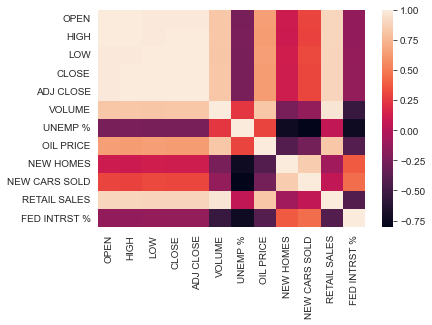

In [69]:
# Your code here
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

8- Create a new column / feature from subtracting the LOW and HIGH column called SPREAD which is the difference between the two.

In [70]:
# Your code here
df['SPREAD'] = df['HIGH'] - df['LOW']

C:\Users\user\AppData\Local\Temp/ipykernel_16536/3706992469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SPREAD'] = df['HIGH'] - df['LOW']


7- Drop the less useful columns

In [75]:
# Your code here
df = df.drop(columns = ['HIGH', 'LOW', 'ADJ CLOSE'])

9- Move the SPREAD column next to CLOSE as they are related

In [76]:
# Your code here
df = df[['DATE', 'OPEN', 'SPREAD', 'CLOSE', 'VOLUME', 
         'UNEMP %','OIL PRICE','NEW HOMES','NEW CARS SOLD', 'RETAIL SALES','FED INTRST %','CSI']]

10- Reset the index 

In [77]:
# Your code here
df = df.reset_index()

11- View final dataframe correlation matrix


<AxesSubplot:>

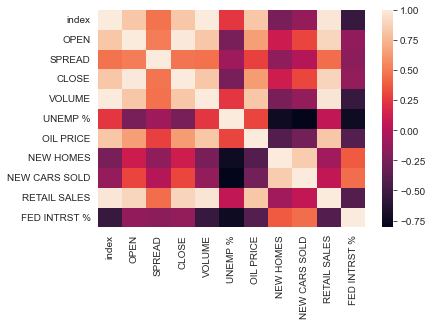

In [78]:
# Your code here
corr_f = df.corr()
sns.heatmap(corr_f, 
        xticklabels=corr_f.columns,
        yticklabels=corr_f.columns)

12- Compare your final result with data on file `../data/cleaned_timeseries.csv`

In [79]:
# Your code here
cleaned_data = pd.read_csv('../data/cleaned_timeseries.csv')
cleaned_data

,DATE,CLOSE,SPREAD,VOLUME,UNEMP %,OIL PRICE,NEW HOMES,NEW CARS SOLD,RETAIL SALES,FED INTRST %,CSI
0,1992-01-01,3223.399902,159.879882,5.611600e+08,7.3,18.16,1176.0,12.6,146913.0,4.03,67.5
1,1992-02-01,3267.699951,85.419922,4.111500e+08,7.4,18.05,1250.0,12.9,147270.0,4.06,68.8
2,1992-03-01,3235.500000,111.359864,4.024100e+08,7.4,17.63,1297.0,12.8,146831.0,3.98,76.0
3,1992-04-01,3359.100098,205.270020,4.583000e+08,7.4,18.92,1099.0,12.6,148082.0,3.73,77.2
4,1992-05-01,3396.899902,116.649902,3.882400e+08,7.6,19.89,1214.0,13.1,149015.0,3.82,79.2
...,...,...,...,...,...,...,...,...,...,...,...
303,2017-08-01,21948.099609,578.769531,6.150060e+09,4.4,51.70,1172.0,16.4,419882.0,1.16,96.8
304,2017-09-01,22405.089844,709.878907,6.342130e+09,4.2,56.15,1159.0,18.9,429623.0,1.15,95.1
305,2017-10-01,23377.240234,1069.250000,7.302910e+09,4.1,57.51,1261.0,18.4,432584.0,1.15,100.7
306,2017-11-01,24272.349609,1085.070313,7.335640e+09,4.1,62.71,1299.0,17.9,436032.0,1.16,98.5


In [81]:
df = df.drop(columns = ['index'])
df

,DATE,OPEN,SPREAD,CLOSE,VOLUME,UNEMP %,OIL PRICE,NEW HOMES,NEW CARS SOLD,RETAIL SALES,FED INTRST %,CSI
0,1992-01-01,3152.100098,159.879882,3223.399902,1992.0,7.3,18.16,1176.0,12.6,146913.0,4.03,67.5
1,1992-02-01,3223.399902,85.419922,3267.699951,1992.0,7.4,18.05,1250.0,12.9,147270.0,4.06,68.8
2,1992-03-01,3267.699951,111.359864,3235.500000,1992.0,7.4,17.63,1297.0,12.8,146831.0,3.98,76
3,1992-04-01,3235.500000,205.270020,3359.100098,1992.0,7.4,18.92,1099.0,12.6,148082.0,3.73,77.2
4,1992-05-01,3359.100098,116.649902,3396.899902,1992.0,7.6,19.89,1214.0,13.1,149015.0,3.82,79.2
...,...,...,...,...,...,...,...,...,...,...,...,...
225,2010-10-01,10789.719727,536.479492,11118.490234,2010.0,9.4,82.67,543.0,12.4,324218.0,0.19,67.7
226,2010-11-01,11120.299805,522.250000,11006.019531,2010.0,9.8,85.28,545.0,12.3,327620.0,0.19,71.6
227,2010-12-01,11007.230469,617.769531,11577.509766,2010.0,9.3,91.45,539.0,12.6,329707.0,0.18,74.5
228,2011-01-01,11577.429688,446.649414,11891.929688,2011.0,9.1,96.52,630.0,12.8,332559.0,0.17,74.2


13- What's your conclusion ?
> Write you answer here